In [ ]:
#  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#  Importing Dataset

In [2]:
url="https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv"
df = pd.read_csv(url,header=0,names=["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Applicant_Income","Coapplicant_Income","Loan_Amount","Loan_Amount_Term","Credit_History","Property_Area","Loan_Status"])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis (EDA)

In [3]:
#Checking few rows on random basis
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
37,LP001114,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y
419,LP002348,Male,Yes,0,Graduate,No,5829,0.0,138.0,360.0,1.0,Rural,Y
288,LP001935,Male,No,0,Graduate,No,9508,0.0,187.0,360.0,1.0,Rural,Y
410,LP002319,Male,Yes,0,Graduate,NaN,6256,0.0,160.0,360.0,NaN,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
523,LP002697,Male,No,0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,N
39,LP001119,Male,No,0,Graduate,No,3600,0.0,80.0,360.0,1.0,Urban,N
532,LP002729,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,NaN,Semiurban,N
89,LP001316,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,Y
149,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural,N


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
612,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [6]:
#Shape of the dataset
df.shape

(613, 13)

Observation: No of rows = 614, No of columns = 13

In [7]:
# Checking the datatype of dataset
df.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
dtype: object

In [8]:
# Checking Unique values in columns
df.nunique().to_frame('No of Unique Values')

,No of Unique Values
Loan_ID,613
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
Applicant_Income,504
Coapplicant_Income,287
Loan_Amount,203
Loan_Amount_Term,10


In [9]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

LP001003    1
LP002332    1
LP002308    1
LP002314    1
LP002315    1
           ..
LP001693    1
LP001698    1
LP001699    1
LP001702    1
LP002990    1
Name: Loan_ID, Length: 613, dtype: int64


Male      488
Female    112
Name: Gender, dtype: int64


Yes    398
No     212
Name: Married, dtype: int64


0     344
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        479
Not Graduate    134
Name: Education, dtype: int64


No     499
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
2600    6
6000    6
5000    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: Applicant_Income, Length: 504, dtype: int64


0.0       272
2500.0      5
2083.0      5
1666.0      5
1459.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: Coapplicant_Income, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
2

Observation : Dropping Loan Id column as it is just a serial no sort of and will not play a role in analysis

In [10]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [11]:
# Checking List of column names
df.columns.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Applicant_Income',
 'Coapplicant_Income',
 'Loan_Amount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              600 non-null    object 
 1   Married             610 non-null    object 
 2   Dependents          598 non-null    object 
 3   Education           613 non-null    object 
 4   Self_Employed       581 non-null    object 
 5   Applicant_Income    613 non-null    int64  
 6   Coapplicant_Income  613 non-null    float64
 7   Loan_Amount         592 non-null    float64
 8   Loan_Amount_Term    599 non-null    float64
 9   Credit_History      563 non-null    float64
 10  Property_Area       613 non-null    object 
 11  Loan_Status         613 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


Observation:
    
There are 3 datatypes Object, Int and Float

Dependents values are 0,1,2,3,3+, because of 3+ its is reflecting as object data type

There are 4 columns in float 1 column in int and 7 object columns

Except for Education,Applicant Income, Coapplicant Income,Property_Area, Loan_Status all other variables have null values.

Memory required for this data is 57.6 kb

In [13]:
df['Dependents'].replace('3+','3', inplace = True)

In [14]:
df['Dependents'].unique()

array(['1', '0', '2', '3', nan], dtype=object)

In [ ]:
df['Credit_History'] = df['Credit_History'].astype('object')

In [15]:
#Checking Null Values
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           21
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

<Axes: >

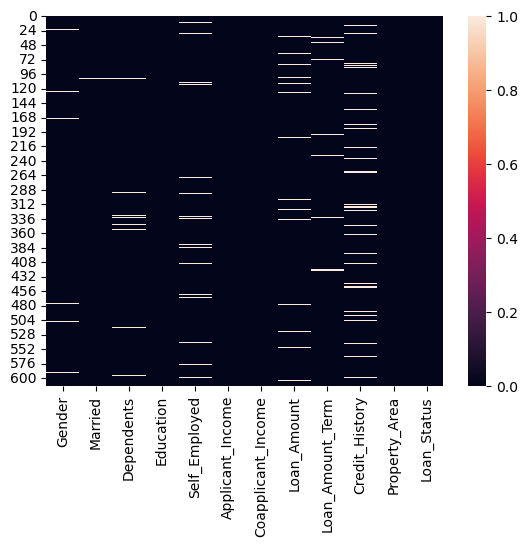

In [16]:
#Checking using heatmap
sns.heatmap(df.isnull())

In [17]:
df.isnull().sum().sum()

148

In [18]:
#Checking the impact of dropping the null values
df1 = df.dropna()

In [19]:
df1.shape

(480, 12)

In [20]:
data_loss = ((df.shape[0] - df1.shape[0]) / df.shape[0]*100)

In [21]:
data_loss

21.69657422512235

# Percentage of Missing value

In [22]:
round((df.isnull().sum()/df.shape[0])*100,2).sort_values(ascending=False)

Credit_History        8.16
Self_Employed         5.22
Loan_Amount           3.43
Dependents            2.45
Loan_Amount_Term      2.28
Gender                2.12
Married               0.49
Education             0.00
Applicant_Income      0.00
Coapplicant_Income    0.00
Property_Area         0.00
Loan_Status           0.00
dtype: float64

Observation : Since dropping of null values indicates significant loss of data (22%) and since the dataset is not too large hence avoiding dropping of null values and work on filling the null values

# Separating Numerical and Categorical Column

In [25]:
cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print('Categorical Columns: ',cat_col)
print('\n')

num_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('Numerical Columns: ',num_col)

Categorical Columns:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']


Numerical Columns:  ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term']


In [26]:
df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History         object
Property_Area          object
Loan_Status            object
dtype: object

# Statistical summary of dataset

In [27]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term
count,613.000000,613.000000,592.000000,599.000000
mean,5402.732463,1623.890571,146.412162,341.969950
std,6114.004114,2927.903583,85.587325,65.170672
min,150.000000,0.000000,9.000000,12.000000
25%,2876.000000,0.000000,100.000000,360.000000
50%,3812.000000,1210.000000,128.000000,360.000000
75%,5780.000000,2302.000000,168.000000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


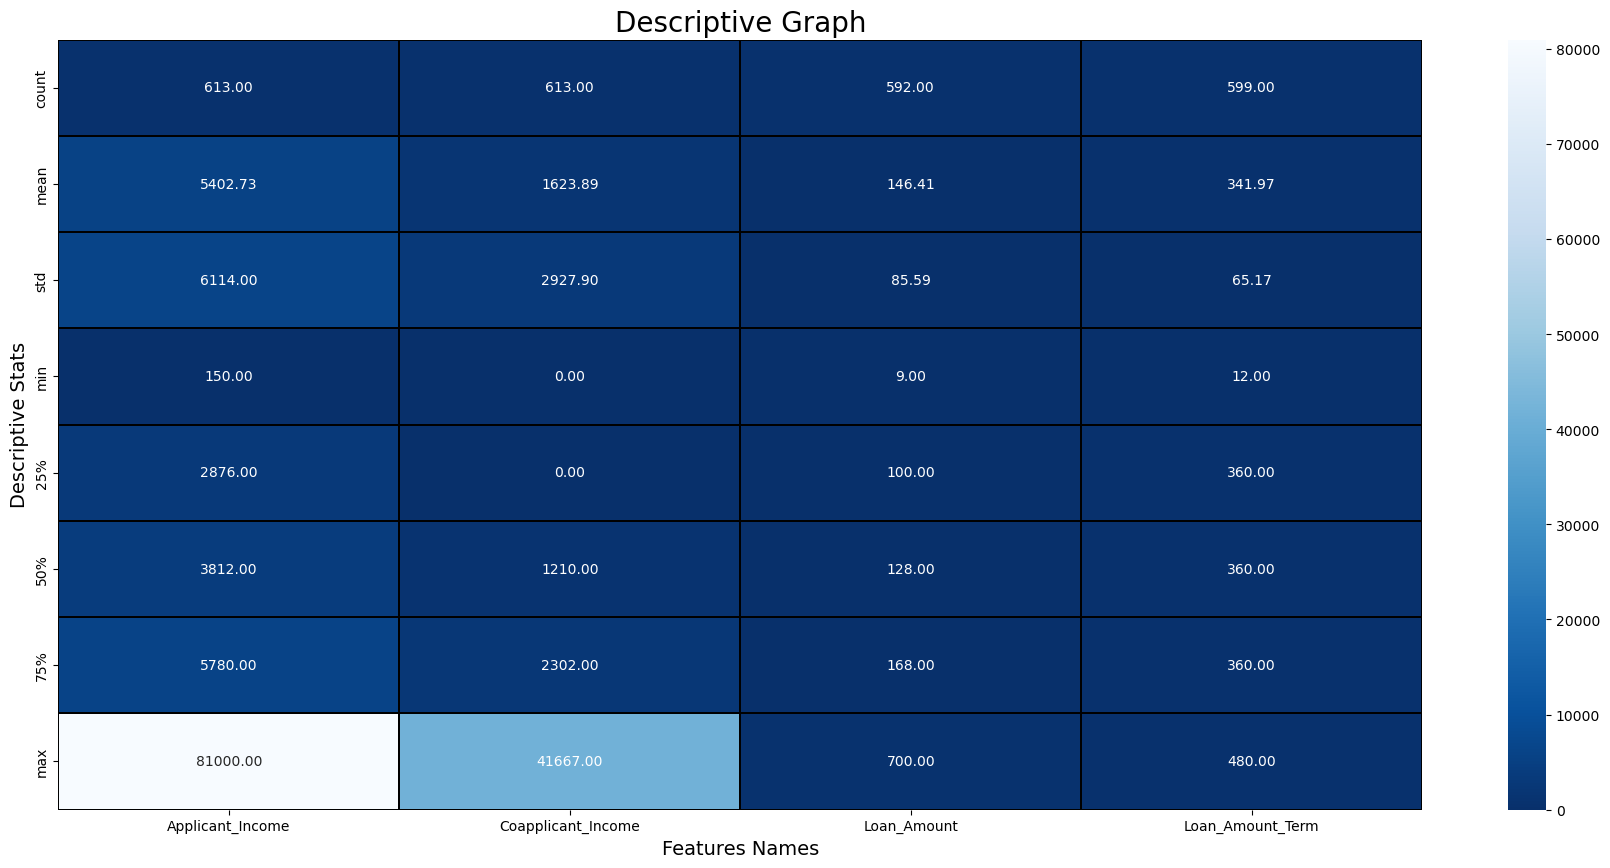

In [28]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Blues_r")
plt.xlabel("Features Names",fontsize=14)
plt.ylabel("Descriptive Stats",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

Findings:


Outliers are clearly evident in ApplicantIncome,CoapplicantIncome, LoanAmount as there is huge difference in 75% and max    
· 
For a few features standard deviation is far from the mean, it may be because of data is more scattered.

· Co-applicant is having a minimum income of zero.

· Maximum loan applied is 700 having a minimum term of 480.

· Minimum loan applied is 9 having minimum term 12.

· Missing values in the Loan amount, loan amount term & credit history.



# Data Visualization

# Univariate Analysis

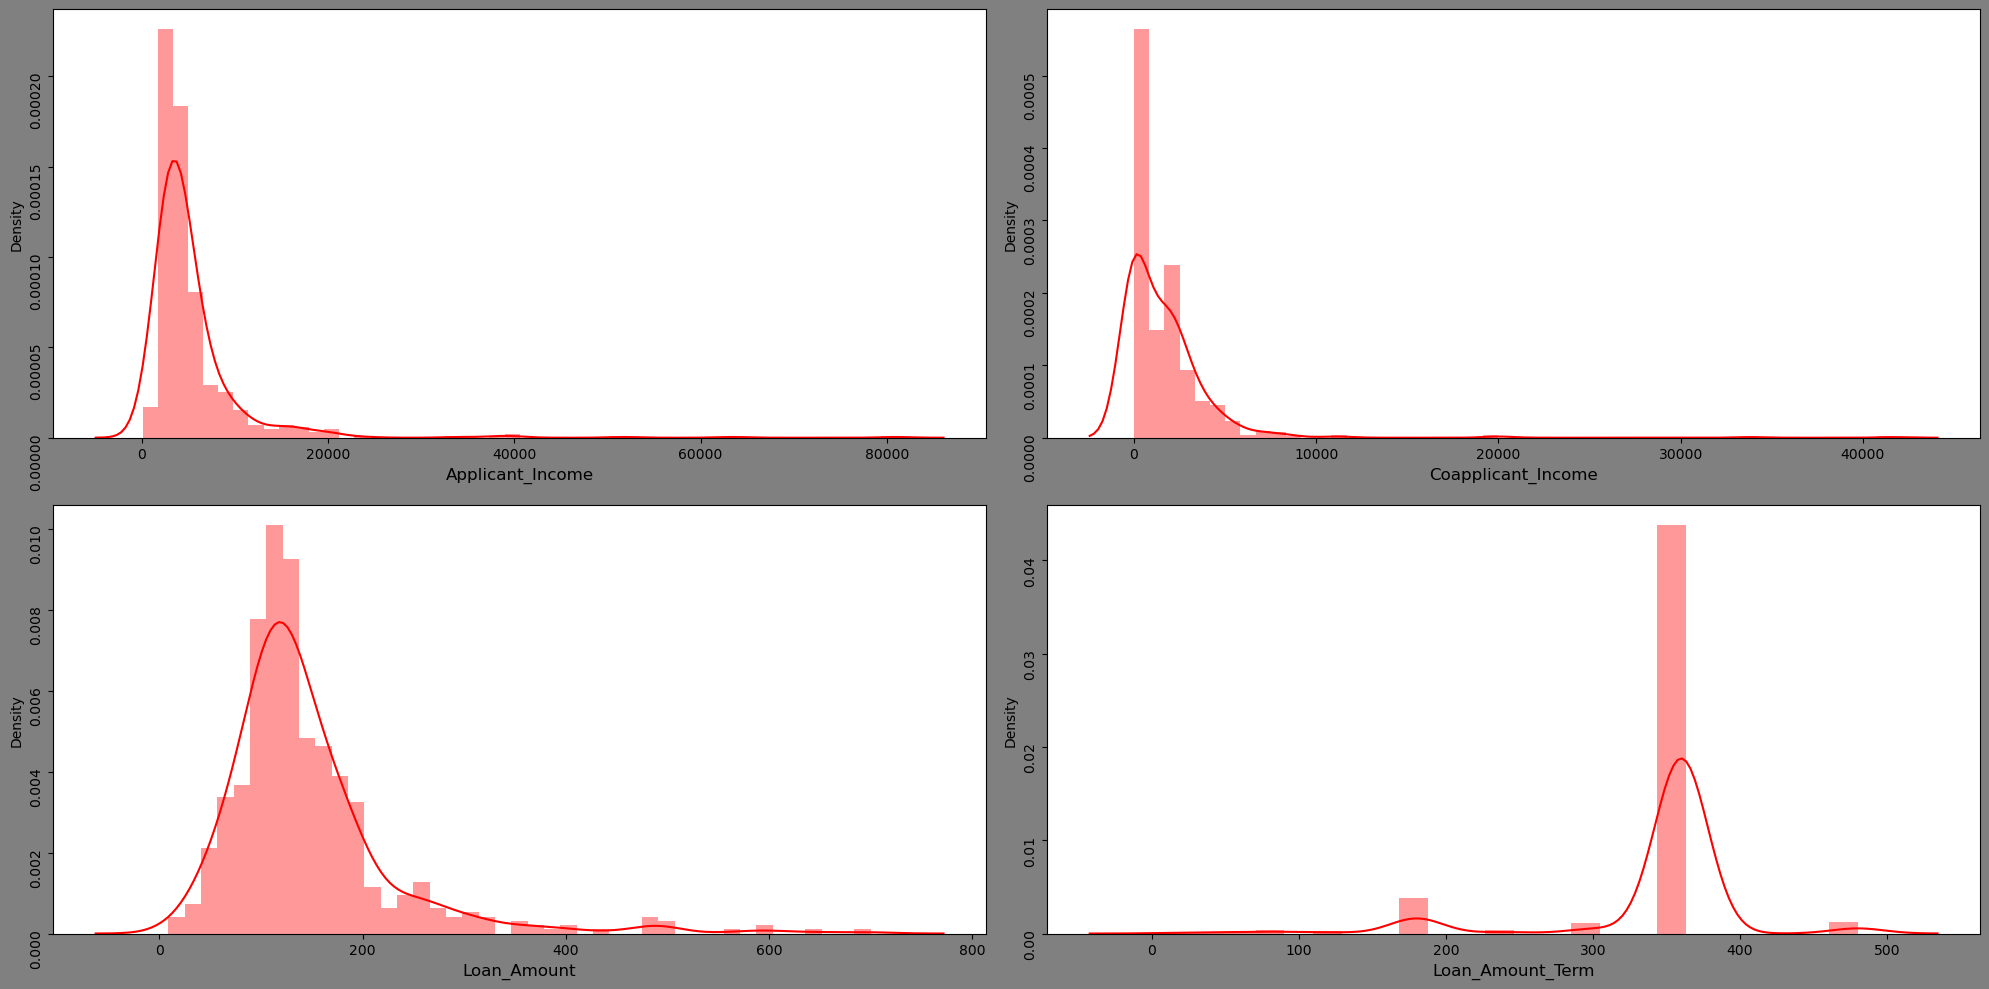

In [29]:
plt.figure(figsize=(20,10), facecolor = 'grey')
pltno = 1
for i in num_col:
    if pltno<=4:
        plt.subplot(2,2,pltno)
        sns.distplot(df[i],color='r')
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation = 90, fontsize=10)
    pltno+=1
plt.tight_layout()

Observation: ApplicantIncome,CoapplicantIncome, LoanAmount is skewed towards the right and indicates outliers.
Loan_Amount_term and Credit_Histry are categorical variables hence skewness and outliers analysis not done

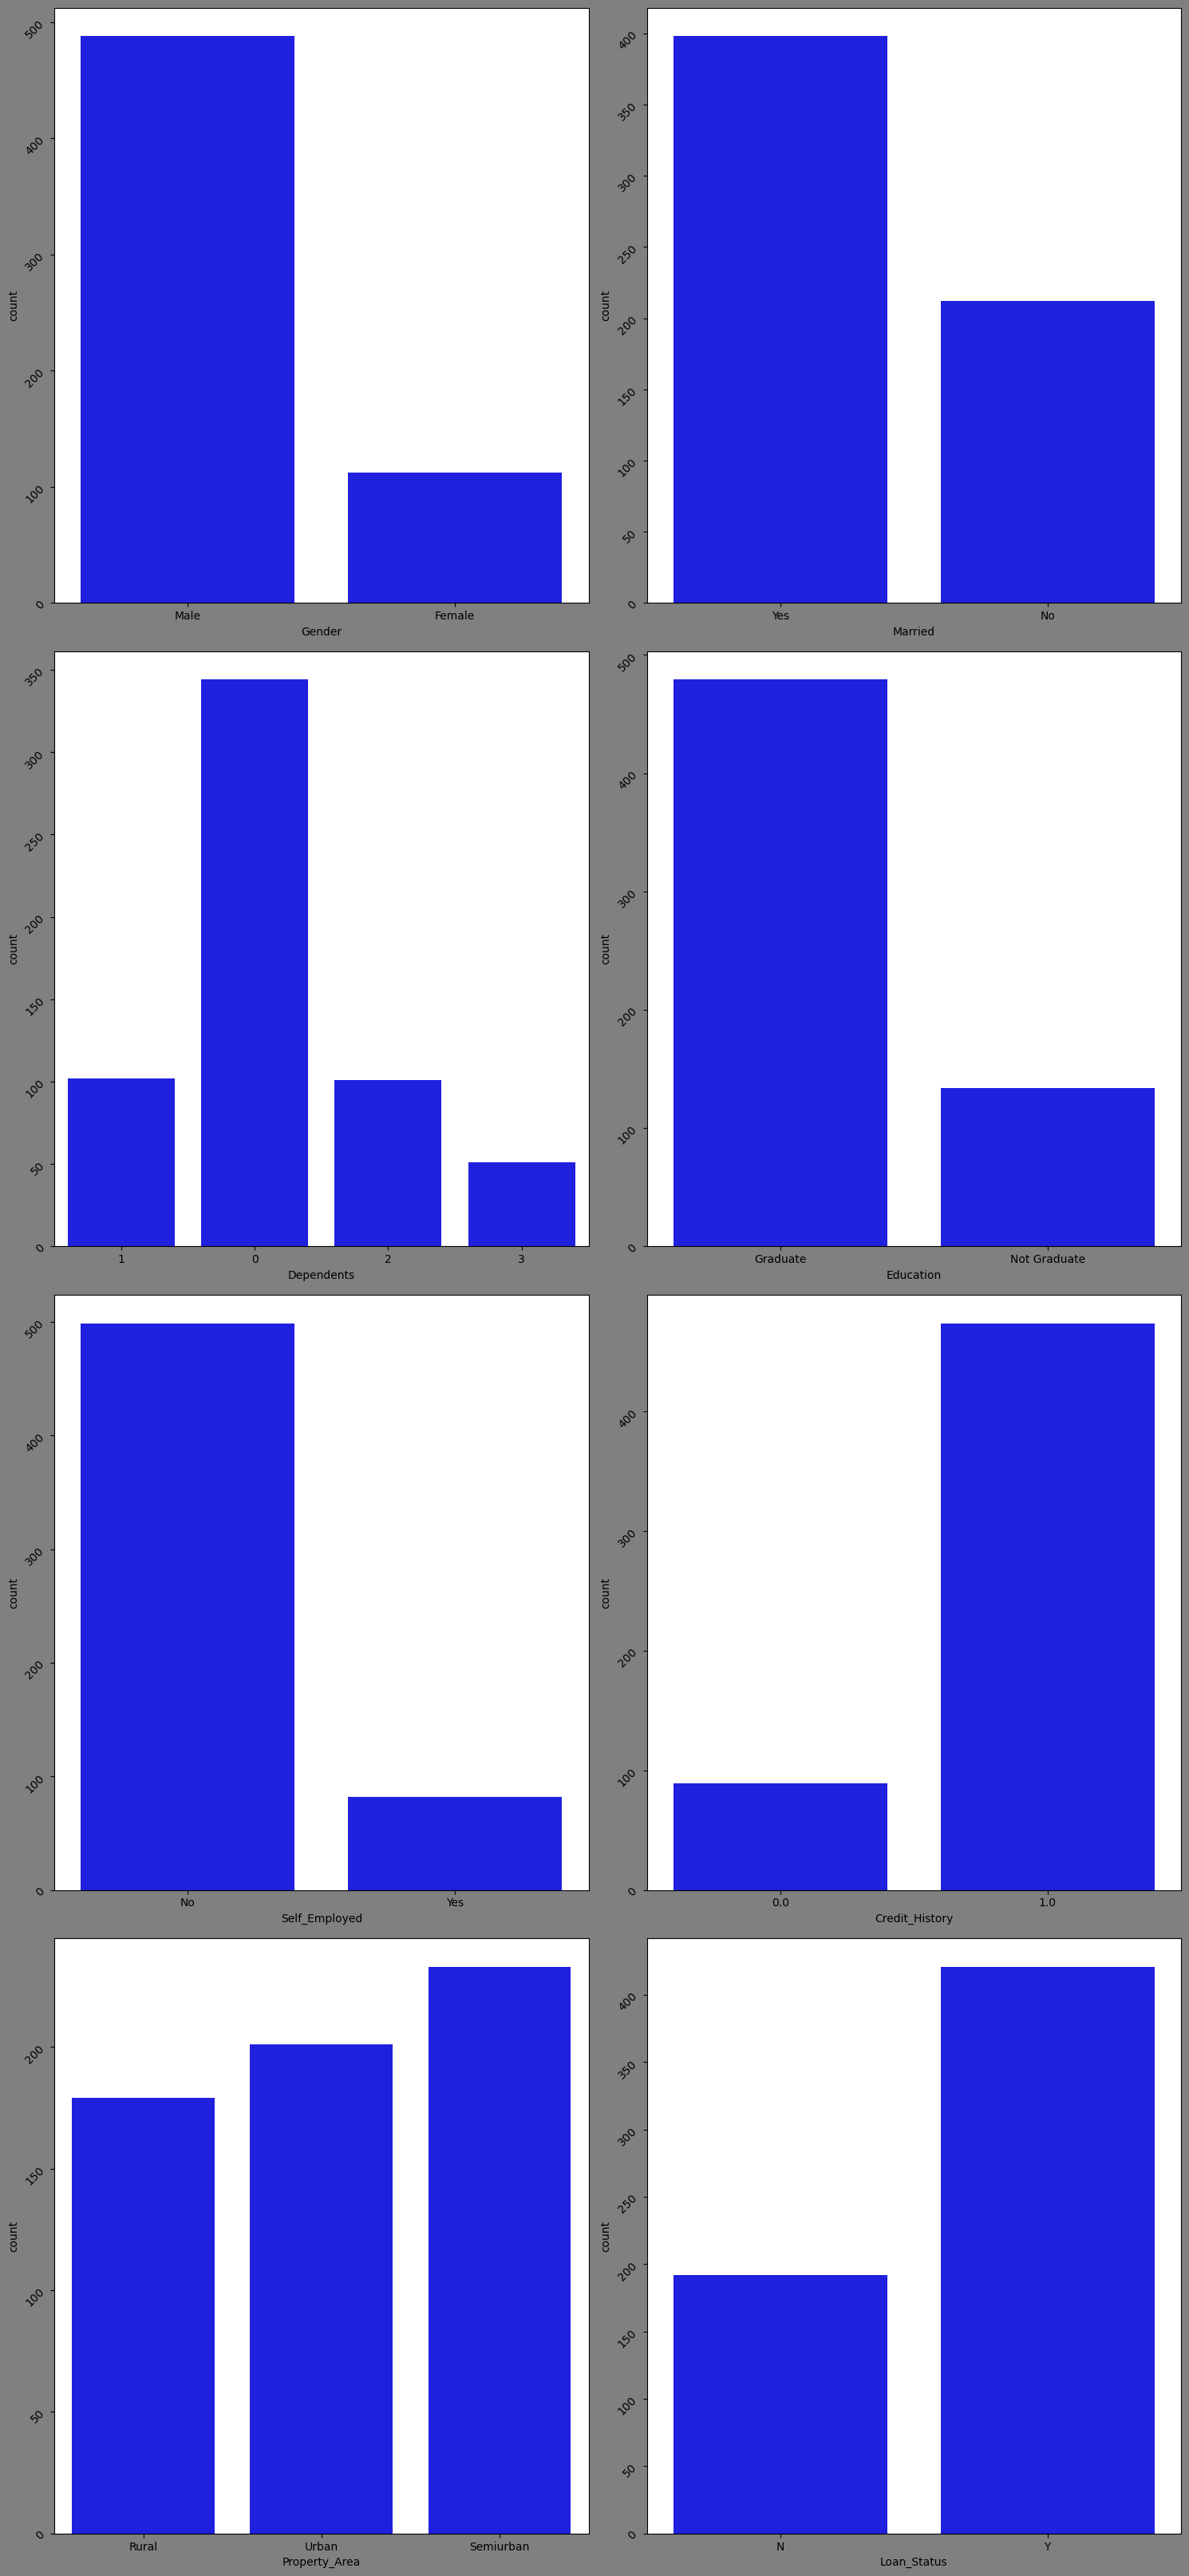

In [31]:
plt.figure(figsize=(15,40), facecolor = 'grey')
pltno = 1
for i in cat_col:
    if pltno<=10:
        plt.subplot(5,2,pltno)
        sns.countplot(x=df[i],color='b')
        plt.xlabel(i,fontsize=10)
        plt.yticks(rotation = 45, fontsize=10)
    pltno+=1
plt.tight_layout()

# Observations
In Gender category male is maximum

In Married category married are max

In Dependents category 0 dependents are >>>> than other, dependents 1 and 2 are almost equal

In Education Catgory Graduate are more

In Self_Employed category non self employed are max

In Property_Area SemiUrban> Urban > Rural

In Loan Status Yes is more




# Bivariate Analysis

Male      488
Female    112
Name: Gender, dtype: int64


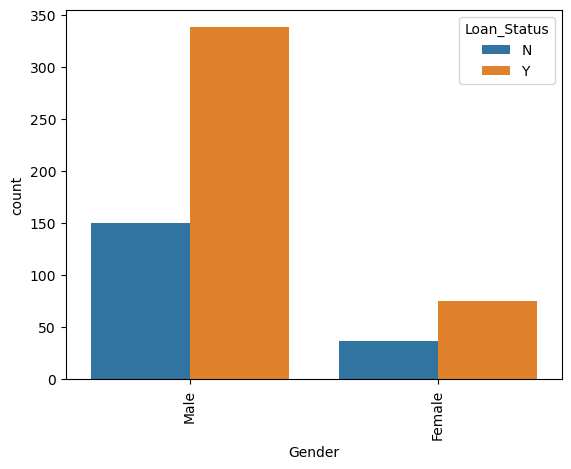

Yes    398
No     212
Name: Married, dtype: int64


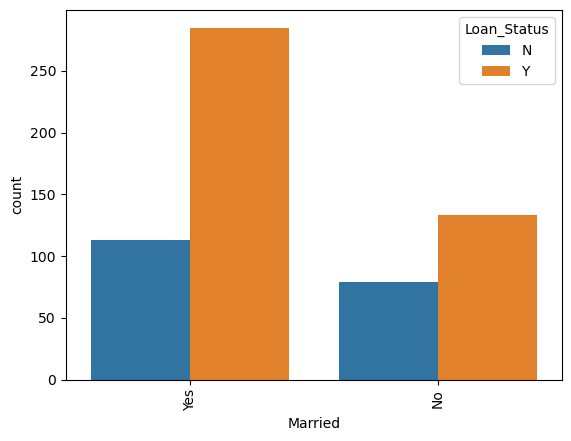

0    344
1    102
2    101
3     51
Name: Dependents, dtype: int64


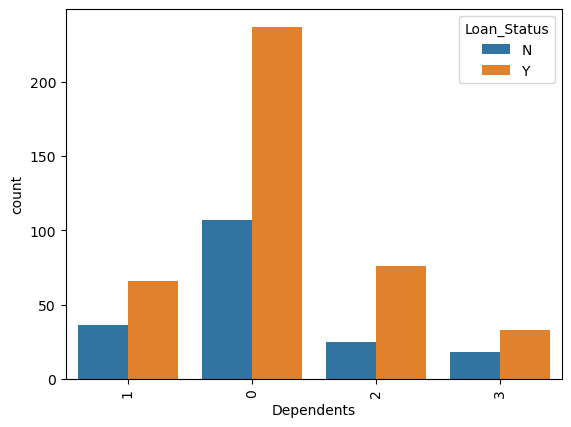

Graduate        479
Not Graduate    134
Name: Education, dtype: int64


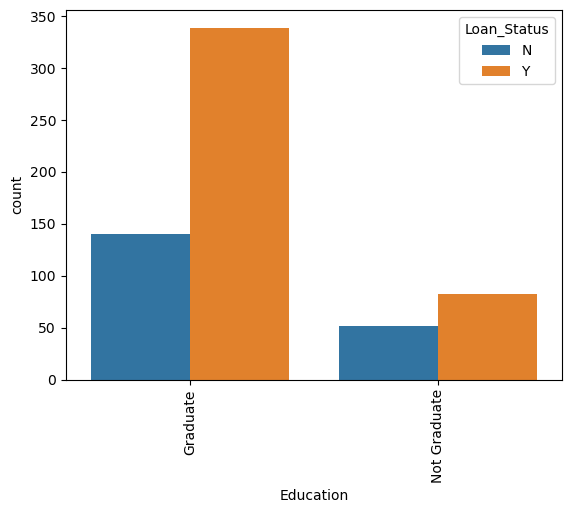

No     499
Yes     82
Name: Self_Employed, dtype: int64


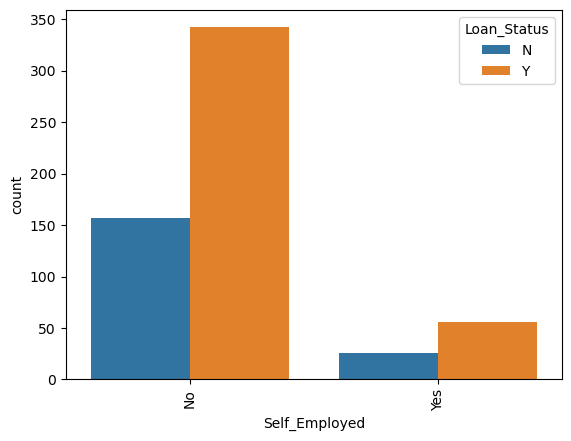

1.0    474
0.0     89
Name: Credit_History, dtype: int64


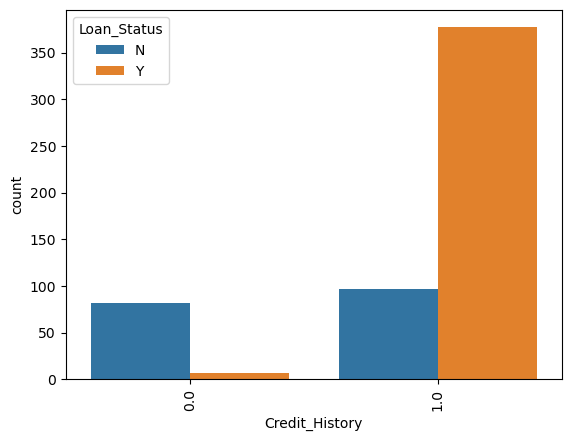

Semiurban    233
Urban        201
Rural        179
Name: Property_Area, dtype: int64


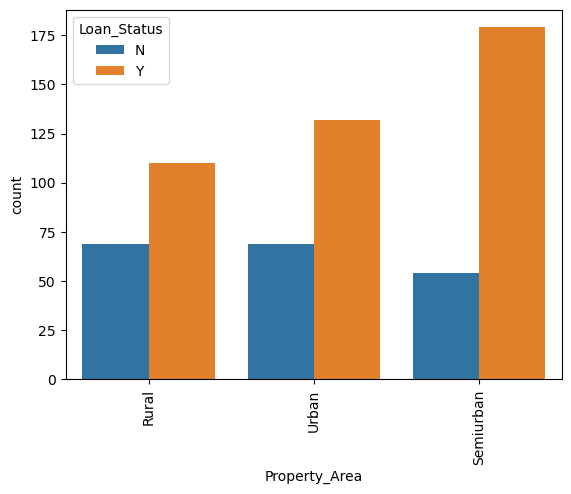

Y    421
N    192
Name: Loan_Status, dtype: int64


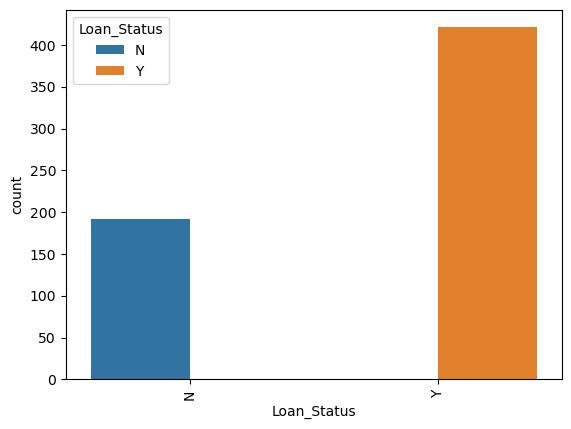

In [37]:
for i in cat_col:
    sns.countplot(x=df[i],hue='Loan_Status',data=df)
    plt.xticks(rotation=90)
    plt.ylabel('count')
    print(df[i].value_counts())
    plt.show()

Observations
Loans advanced to males are high, having aview at the plot also shows of the female clients 50% of them were also granted loan.

% of clients granted loan are higher in case of married

As the no of clients who do not have dependents are more and hence the loan granted are also high but at the same time it is 
evident from the plot that the % of loan approved is 50% but in case of dependents being 2 the % wise approval is higher
although the total count is low

Education wise the graduates have higher % of loan approved

Non-Self Employed % of loan granted is high

Property Area Semi Urban count as well as % loan granted is high

Person with no credit history the probability of loan being rejected is high

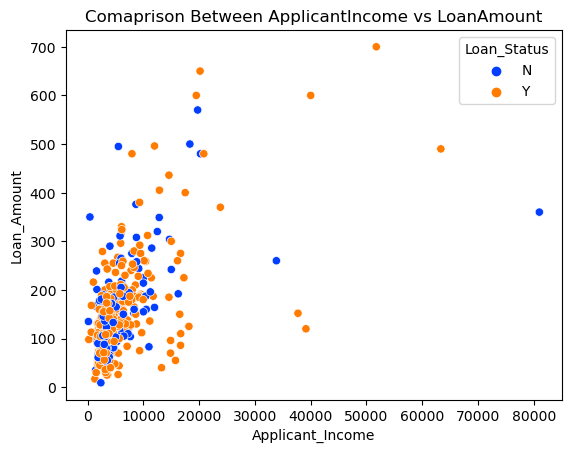

In [38]:
plt.title('Comaprison Between ApplicantIncome vs LoanAmount')
sns.scatterplot(x='Applicant_Income',y='Loan_Amount',data=df,hue='Loan_Status',palette = 'bright')
plt.show()

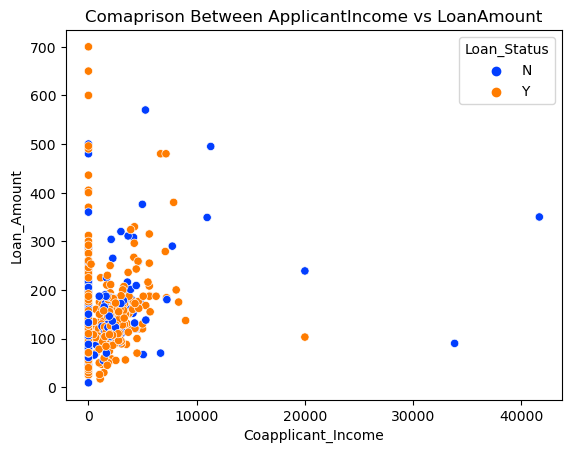

In [39]:
plt.title('Comaprison Between ApplicantIncome vs LoanAmount')
sns.scatterplot(x='Coapplicant_Income',y='Loan_Amount',data=df,hue='Loan_Status',palette = 'bright')
plt.show()

Observation With coapplicant the loan status yes is more

# Multivariate Analysis

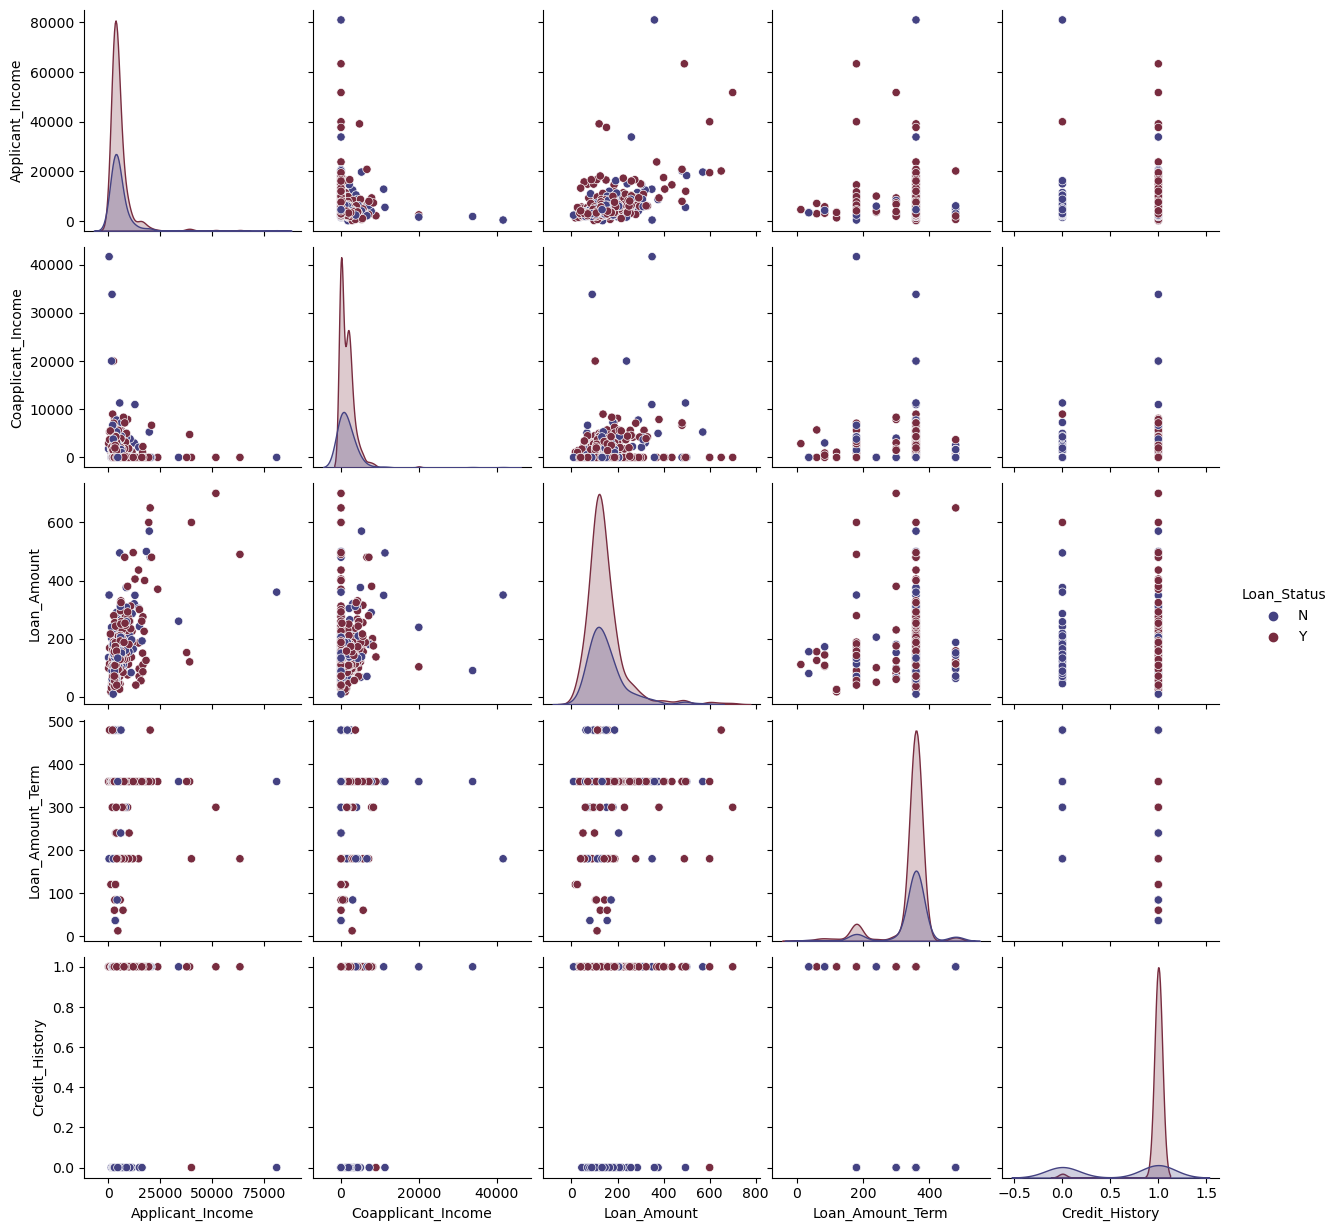

In [41]:
sns.pairplot(df,hue='Loan_Status',palette='icefire')
plt.show()

Observation: ApplicantIncome and Loan Amount, Coapplicant Income and Loan Amount are related

In [42]:
# Imputing value in NaN, missing value
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

for i in cat_col:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
    
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [43]:
imp=SimpleImputer(missing_values=np.nan,strategy="mean")
for i in num_col:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
    
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
609,Male,Yes,3,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
610,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
611,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [44]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
#Cheking Statistical Summary of dataset after imputing missing values
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term
count,613.000000,613.000000,613.000000,613.000000
mean,5402.732463,1623.890571,146.412162,341.969950
std,6114.004114,2927.903583,84.106098,64.420943
min,150.000000,0.000000,9.000000,12.000000
25%,2876.000000,0.000000,100.000000,360.000000
50%,3812.000000,1210.000000,129.000000,360.000000
75%,5780.000000,2302.000000,165.000000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


In [46]:
df.nunique().to_frame("No. of unique value")

,No. of unique value
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
Applicant_Income,504
Coapplicant_Income,287
Loan_Amount,204
Loan_Amount_Term,11
Credit_History,2


In [47]:
df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income      float64
Coapplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History         object
Property_Area          object
Loan_Status            object
dtype: object

# Checking for outliers

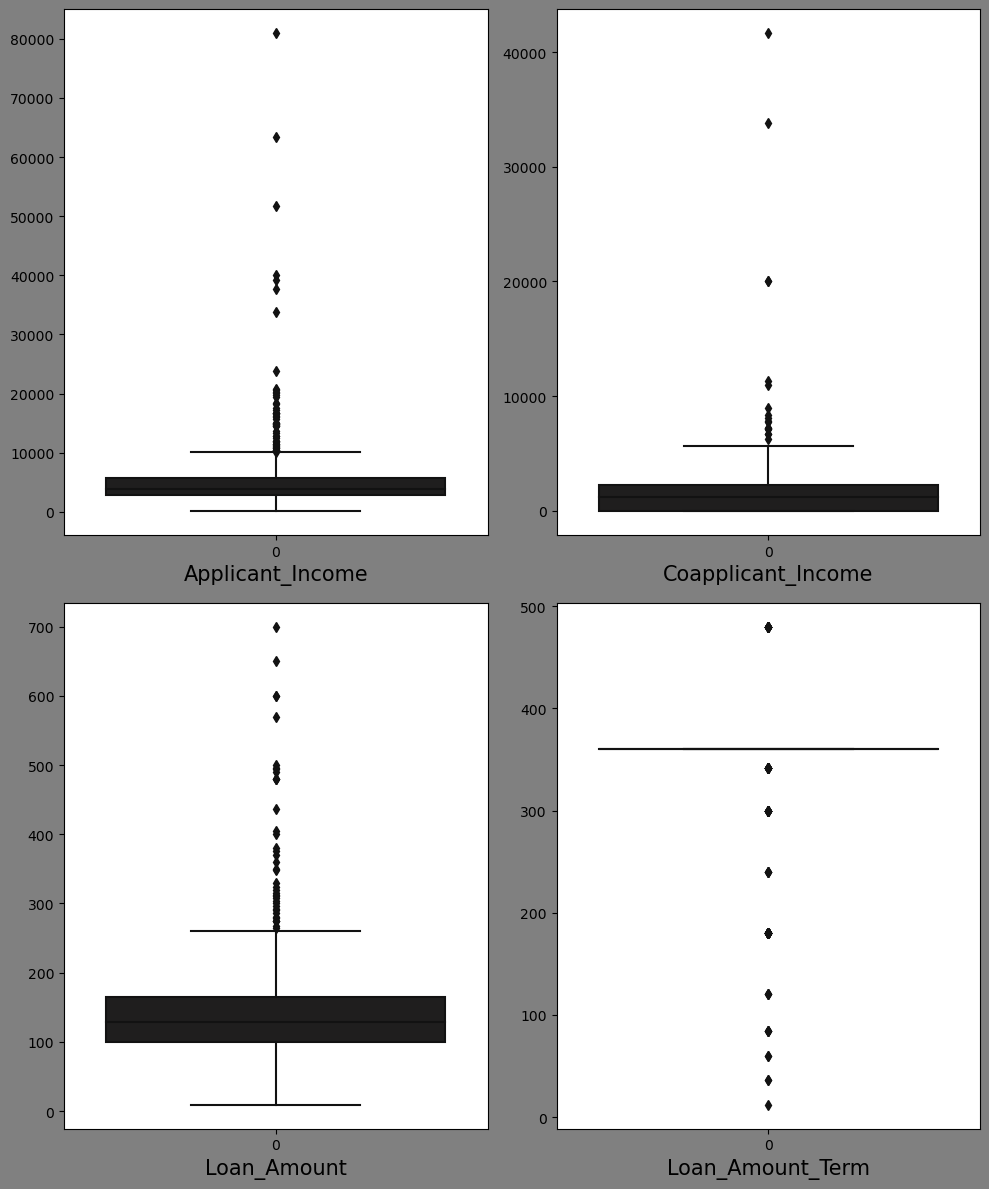

In [50]:
plt.figure(figsize=(10,12),facecolor='grey')
pltno = 1
for i in num_col:
    if pltno<=4:
        plt.subplot(2,2,pltno)
        sns.boxplot(df[i],palette='icefire')
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation = 0,fontsize=10)
    pltno+=1
plt.tight_layout()

In [52]:
from scipy.stats import zscore
out_feat = df[['Applicant_Income','Coapplicant_Income','Loan_Amount']]
z = np.abs(zscore(out_feat))


In [53]:
np.where(z>3)

(array([  8, 125, 129, 154, 154, 170, 170, 176, 176, 182, 184, 277, 307,
        332, 332, 368, 401, 408, 416, 431, 442, 486, 505, 522, 524, 560,
        580, 599, 603], dtype=int64),
 array([1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2,
        2, 2, 2, 2, 1, 1, 2], dtype=int64))

In [54]:
df1=df[(z<3).all(axis=1)]

In [55]:
df1.shape

(588, 12)

In [56]:
print("The loss of data in percentage",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

The loss of data in percentage 4.078303425774878


In [57]:
#Checking for Skewness
df1.skew()

Dependents            1.036249
Applicant_Income      2.165819
Coapplicant_Income    1.351274
Loan_Amount           1.076410
Loan_Amount_Term     -2.430134
Credit_History       -2.007254
dtype: float64

In [58]:
df1['Applicant_Income']=np.cbrt(df1['Applicant_Income'])
df1['Coapplicant_Income']=np.cbrt(df1['Coapplicant_Income'])
df1['Loan_Amount']=np.cbrt(df1['Loan_Amount'])

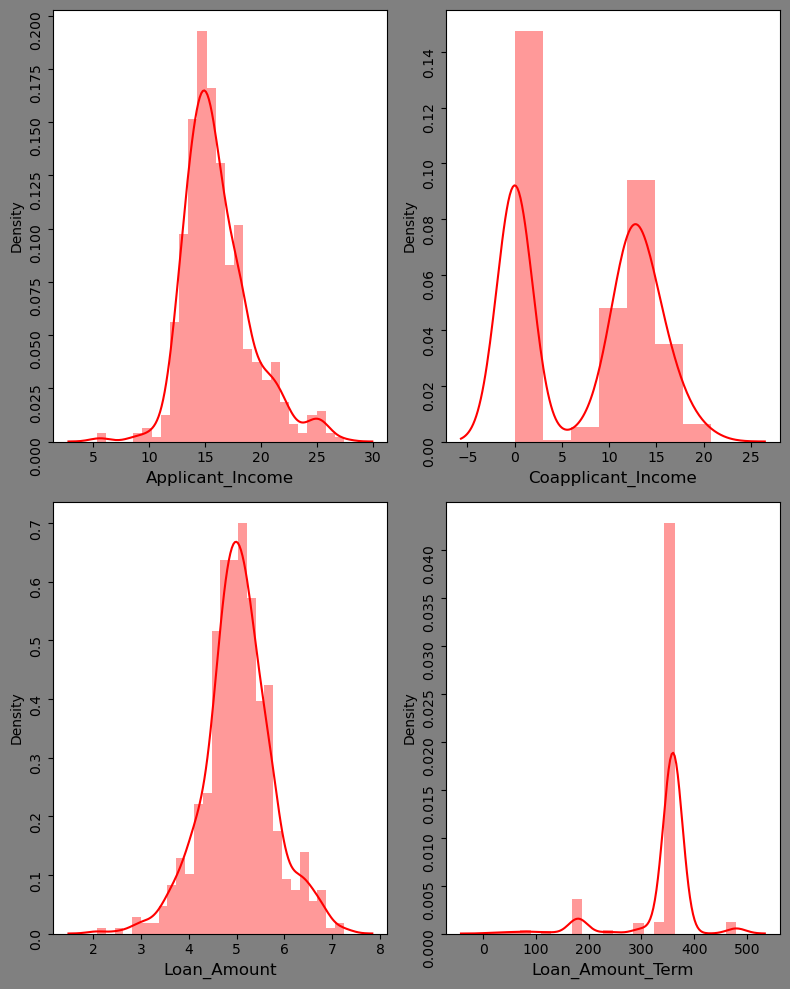

In [61]:
# Lets check how the data has been distributed in numerical column

plt.figure(figsize=(8,10),facecolor="grey")
pltno=1
for col in num_col:
    if pltno<=4:
        plt.subplot(2,2,pltno)
        sns.distplot(df1[col],color="r")
        plt.xlabel(col,fontsize = 12)
        plt.yticks(rotation = 90, fontsize = 10)
    pltno+=1
plt.tight_layout()

# Correlation b/w target variable and independent variable¶

# Multicollinearity

In [62]:
cor=df1.corr()
cor

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term
Applicant_Income,1.000000,-0.341084,0.440752,-0.034462
Coapplicant_Income,-0.341084,1.000000,0.231385,0.003127
Loan_Amount,0.440752,0.231385,1.000000,0.097413
Loan_Amount_Term,-0.034462,0.003127,0.097413,1.000000


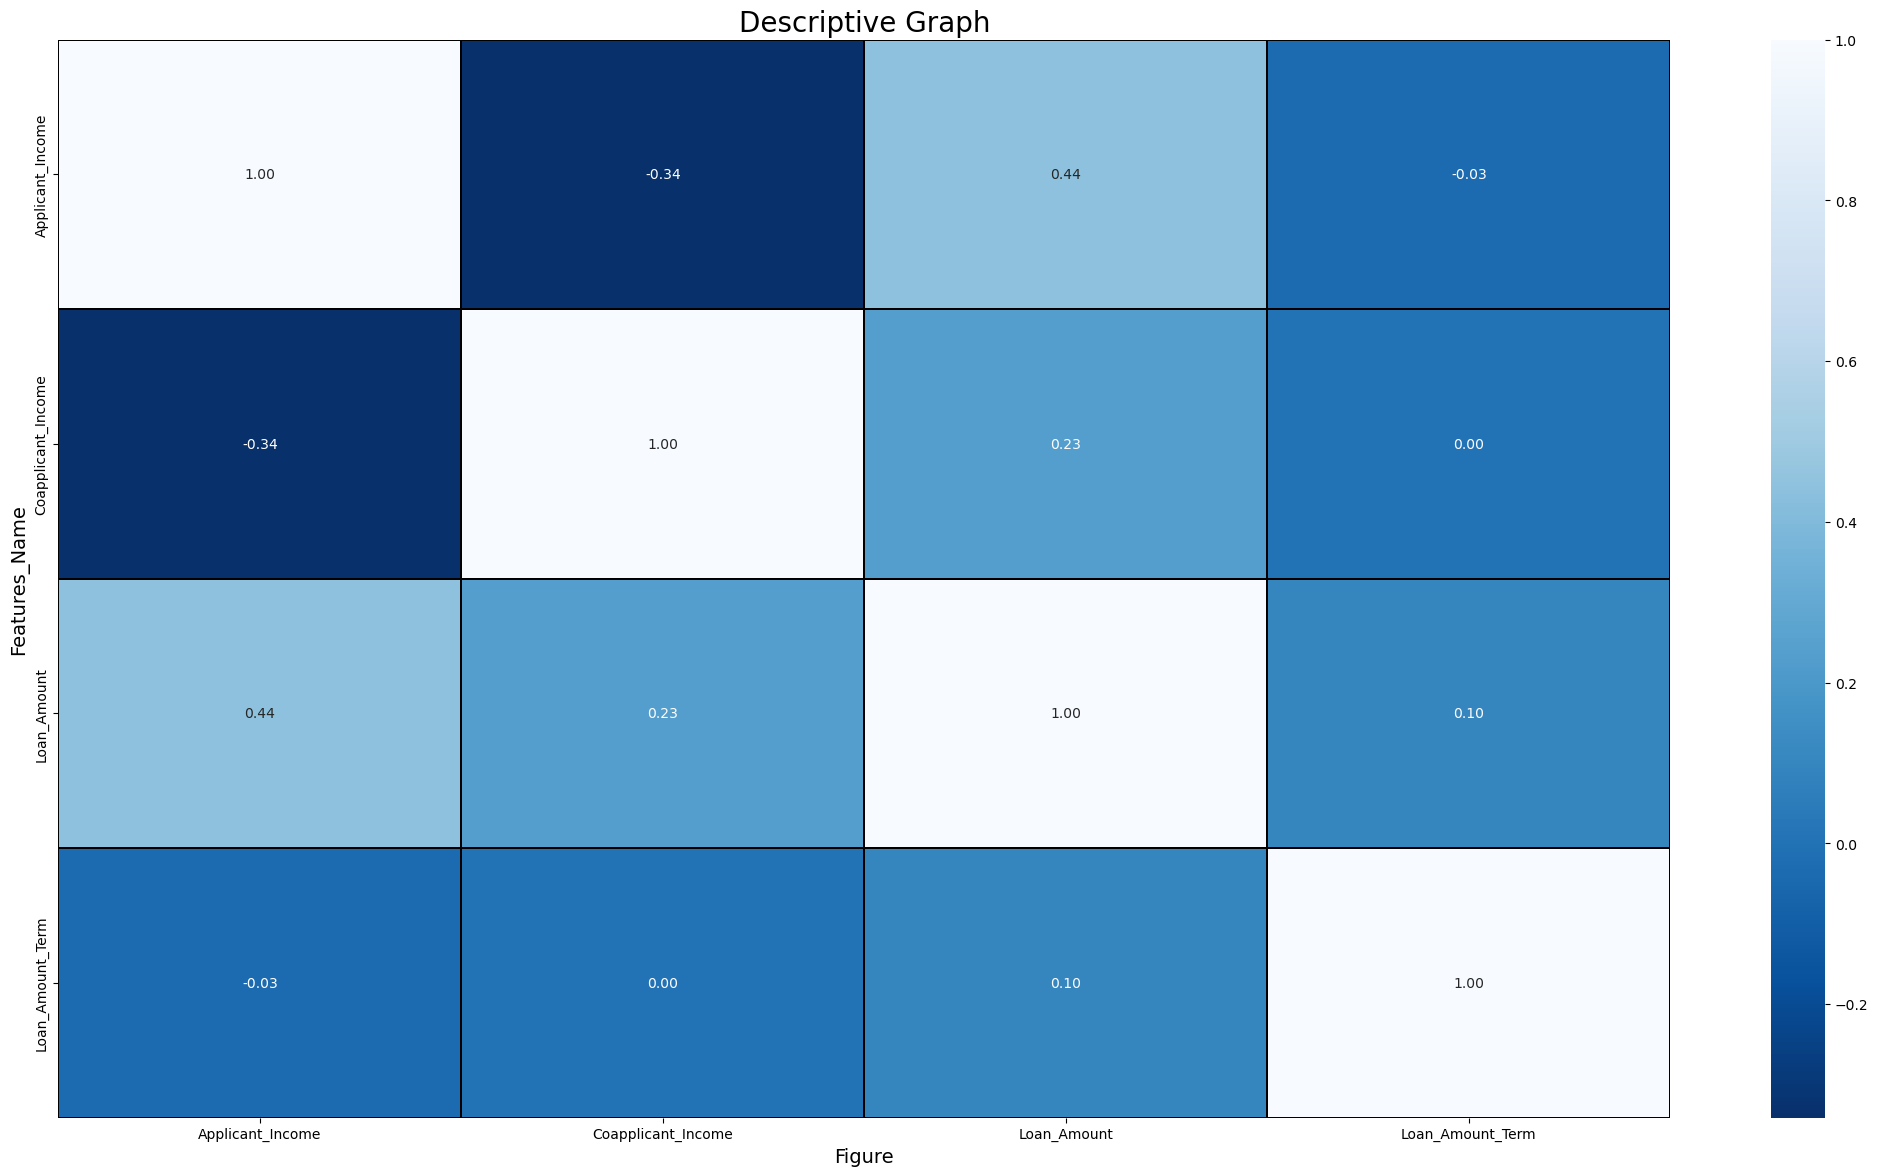

In [63]:
#Visualizing the correlation marix by using  heatmap

plt.figure(figsize=(26,14))
sns.heatmap(cor,annot=True,fmt="0.2f",linewidth = 0.2,linecolor="black", cmap="Blues_r")
plt.xlabel("Figure",fontsize=14)
plt.ylabel("Features_Name", fontsize=14)
plt.title("Descriptive Graph", fontsize=20)
plt.show()

# Feature Preprocessing 

In [69]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

for i in df1:
    if df1[i].dtypes=="object":
        df1[i]=LE.fit_transform(df1[i].values.reshape(-1,1))
        
        
df1

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,16.610522,11.467457,5.039684,360.0,1,0,0
1,1,1,0,0,1,14.422496,0.000000,4.041240,360.0,1,2,1
2,1,1,0,1,0,13.720654,13.310098,4.932424,360.0,1,2,1
3,1,0,0,0,0,18.171206,0.000000,5.204828,360.0,1,2,1
4,1,1,2,0,1,17.562498,16.129163,6.439277,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,0,0,0,0,14.260431,0.000000,4.140818,360.0,1,0,1
609,1,1,3,0,0,16.013010,0.000000,3.419952,180.0,1,0,1
610,1,1,1,0,0,20.059821,6.214465,6.324704,360.0,1,2,1
611,1,1,2,0,0,19.646281,0.000000,5.718479,360.0,1,2,1


# Separating Feature and Target Variable

In [70]:
x = df1.drop('Loan_Status',axis=1)
y = df1['Loan_Status']

In [71]:
x

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,0,0,16.610522,11.467457,5.039684,360.0,1,0
1,1,1,0,0,1,14.422496,0.000000,4.041240,360.0,1,2
2,1,1,0,1,0,13.720654,13.310098,4.932424,360.0,1,2
3,1,0,0,0,0,18.171206,0.000000,5.204828,360.0,1,2
4,1,1,2,0,1,17.562498,16.129163,6.439277,360.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
608,0,0,0,0,0,14.260431,0.000000,4.140818,360.0,1,0
609,1,1,3,0,0,16.013010,0.000000,3.419952,180.0,1,0
610,1,1,1,0,0,20.059821,6.214465,6.324704,360.0,1,2
611,1,1,2,0,0,19.646281,0.000000,5.718479,360.0,1,2


In [72]:
y

0      0
1      1
2      1
3      1
4      1
      ..
608    1
609    1
610    1
611    1
612    0
Name: Loan_Status, Length: 588, dtype: int32

# Scaling Using Standard Scaler

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477030,0.731606,0.275001,-0.543281,-0.385276,0.163783,0.598696,0.004750,0.279474,0.413902,-1.311832
1,0.477030,0.731606,-0.729350,-0.543281,2.595543,-0.563720,-1.091920,-1.400783,0.279474,0.413902,1.225528
2,0.477030,0.731606,-0.729350,1.840668,-0.385276,-0.797077,0.870352,-0.146242,0.279474,0.413902,1.225528
3,0.477030,-1.366855,-0.729350,-0.543281,-0.385276,0.682699,-1.091920,0.237227,0.279474,0.413902,1.225528
4,0.477030,0.731606,1.279352,-0.543281,2.595543,0.480308,1.285958,1.974989,0.279474,0.413902,1.225528
...,...,...,...,...,...,...,...,...,...,...,...
583,-2.096305,-1.366855,-0.729350,-0.543281,-0.385276,-0.617605,-1.091920,-1.260605,0.279474,0.413902,-1.311832
584,0.477030,0.731606,2.283702,-0.543281,-0.385276,-0.034885,-1.091920,-2.275385,-2.518330,0.413902,-1.311832
585,0.477030,0.731606,0.275001,-0.543281,-0.385276,1.310649,-0.175738,1.813701,0.279474,0.413902,1.225528
586,0.477030,0.731606,1.279352,-0.543281,-0.385276,1.173151,-1.091920,0.960305,0.279474,0.413902,1.225528


# Checking Variance Inflation Factor

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.214816,Gender
1,1.396471,Married
2,1.176789,Dependents
3,1.066214,Education
4,1.064342,Self_Employed
5,1.792672,Applicant_Income
6,1.602920,Coapplicant_Income
7,1.630263,Loan_Amount
8,1.055907,Loan_Amount_Term
9,1.009153,Credit_History


Observation: Since VIF value is less than 10 all feature retained

# Applying oversampling using SMOTE

In [75]:
y.value_counts()

1    406
0    182
Name: Loan_Status, dtype: int64

In [76]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y = SM.fit_resample(x,y)

# Determination of Loan_Status - Classification Problem

# Modelling

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report , confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [79]:
# List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('Extra Tree', ExtraTreesClassifier()),
    ('Bagging', BaggingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('SVC', SVC())]

# Variables to store the best results
best_random_states = []
best_accuracies = []

# Evaluate each model
for model_name, model in models:
    maxAcc = 0
    maxRs = 0
    for i in range(1, 100):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        acc = accuracy_score(y_test, pred)
        if acc > maxAcc:
            maxAcc = acc
            maxRs = i
    best_random_states.append((model_name, maxRs))
    best_accuracies.append((model_name, maxAcc))
    print("Max r2 score for ",model_name, "is:", maxAcc, "on Random State", maxRs)

# Print summary of results
print("\nSummary of best random states and accuracies for each model:")
for i in range(len(models)):
    model_name = models[i][0]
    print("Maximum r2 score is", best_accuracies[i][1], "on Random_state", best_random_states[i][1])


Max r2 score for  Logistic Regression is: 0.7663934426229508 on Random State 78
Max r2 score for  Gradient Boosting is: 0.8565573770491803 on Random State 61
Max r2 score for  Random Forest is: 0.8688524590163934 on Random State 57
Max r2 score for  KNN is: 0.7827868852459017 on Random State 40
Max r2 score for  Extra Tree is: 0.8647540983606558 on Random State 66
Max r2 score for  Bagging is: 0.8442622950819673 on Random State 57
Max r2 score for  AdaBoost is: 0.819672131147541 on Random State 30
Max r2 score for  SVC is: 0.7950819672131147 on Random State 20

Summary of best random states and accuracies for each model:
Maximum r2 score is 0.7663934426229508 on Random_state 78
Maximum r2 score is 0.8565573770491803 on Random_state 61
Maximum r2 score is 0.8688524590163934 on Random_state 57
Maximum r2 score is 0.7827868852459017 on Random_state 40
Maximum r2 score is 0.8647540983606558 on Random_state 66
Maximum r2 score is 0.8442622950819673 on Random_state 57
Maximum r2 score is 0.8

# Train Test Split

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=78)

# a) Logistic Regression

In [81]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7663934426229508
[[ 64  49]
 [  8 123]]
              precision    recall  f1-score   support

           0       0.89      0.57      0.69       113
           1       0.72      0.94      0.81       131

    accuracy                           0.77       244
   macro avg       0.80      0.75      0.75       244
weighted avg       0.80      0.77      0.76       244



In [82]:
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predLR)-score.mean())

[0.69325153 0.70552147 0.69135802 0.7345679  0.67901235]
0.7007422555479815
Difference betn accuracy score and CVC is:  0.06565118707496931


# b) Gradient Boosting Classifier

In [83]:
#Setting best random_state for Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=61)

In [84]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc = gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8565573770491803
[[ 94  31]
 [  4 115]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       125
           1       0.79      0.97      0.87       119

    accuracy                           0.86       244
   macro avg       0.87      0.86      0.86       244
weighted avg       0.88      0.86      0.86       244



In [85]:
score=cross_val_score(gbc,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predgbc)-score.mean())

[0.6809816  0.73006135 0.85185185 0.85185185 0.85185185]
0.7933197000681664
Difference betn accuracy score and CVC is:  0.0632376769810139


# c) Random Forest Classifier

In [86]:
#Setting best random_state for Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=57)

In [87]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8483606557377049
[[106  25]
 [ 12 101]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       131
           1       0.80      0.89      0.85       113

    accuracy                           0.85       244
   macro avg       0.85      0.85      0.85       244
weighted avg       0.85      0.85      0.85       244



In [88]:
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predRFC)-score.mean())

[0.7791411  0.77300613 0.87037037 0.87654321 0.90123457]
0.8400590774823904
Difference betn accuracy score and CVC is:  0.008301578255314523


# d)Extra Tree Classifier

In [89]:
#Setting best random_state for Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=66)

In [90]:
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc = etc.predict(x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.860655737704918
[[100  25]
 [  9 110]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.85       125
           1       0.81      0.92      0.87       119

    accuracy                           0.86       244
   macro avg       0.87      0.86      0.86       244
weighted avg       0.87      0.86      0.86       244



In [91]:
score=cross_val_score(etc,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predetc)-score.mean())

[0.79754601 0.81595092 0.86419753 0.88888889 0.85802469]
0.8449216087252897
Difference betn accuracy score and CVC is:  0.015734128979628337


# e) Bagging Classifier

In [92]:
#Setting best random_state for Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=57)

In [93]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)
predbc = bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.8114754098360656
[[104  27]
 [ 19  94]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       131
           1       0.78      0.83      0.80       113

    accuracy                           0.81       244
   macro avg       0.81      0.81      0.81       244
weighted avg       0.81      0.81      0.81       244



In [94]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predbc)-score.mean())

[0.74233129 0.70552147 0.82098765 0.83333333 0.83333333]
0.7871014163447703
Difference betn accuracy score and CVC is:  0.02437399349129532


# f) AdaBoost Classifier

In [95]:
#Setting best random_state for Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=30)

In [96]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc = abc.predict(x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.819672131147541
[[ 95  31]
 [ 13 105]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       126
           1       0.77      0.89      0.83       118

    accuracy                           0.82       244
   macro avg       0.83      0.82      0.82       244
weighted avg       0.83      0.82      0.82       244



In [97]:
score=cross_val_score(abc,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predabc)-score.mean())

[0.6809816  0.74846626 0.78395062 0.82716049 0.74691358]
0.7574945088237521
Difference betn accuracy score and CVC is:  0.06217762232378887


# g) Support Machine Vector Classifier

In [98]:
# Setting best random_state for Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=20)

In [99]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7950819672131147
[[ 77  40]
 [ 10 117]]
              precision    recall  f1-score   support

           0       0.89      0.66      0.75       117
           1       0.75      0.92      0.82       127

    accuracy                           0.80       244
   macro avg       0.82      0.79      0.79       244
weighted avg       0.81      0.80      0.79       244



In [100]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference betn accuracy score and CVC is: ", accuracy_score(y_test,predsvc)-score.mean())

[0.71165644 0.74233129 0.69753086 0.77160494 0.69135802]
0.7228963114443687
Difference betn accuracy score and CVC is:  0.07218565576874603


# Observation: Considering the difference between accuracy score and CVC as 0.015 and accuracy 86% the best model is Extra Tree Classifier

# Hypertunning

In [107]:
from sklearn.model_selection import GridSearchCV
parameters = {"criterion" : ['gini','entropy'],
             "random_state" : [10,50,100],
             "max_depth" : [None,10,20],
             "n_jobs" : [-2,-1,1],
             "n_estimators" : [50,100,200]}

In [108]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [109]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200], 'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 100]})

In [110]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 50}

In [111]:
loan_model = ExtraTreesClassifier(criterion='gini',max_depth=None,n_estimators=100,n_jobs=-2,random_state=50)
loan_model.fit(x_train,y_train)
pred = loan_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

86.88524590163934


# Ploting Receiver Operating Characteristic (ROC) Curve and AUC

In [112]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [114]:
y_pred_prob = loan_model.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

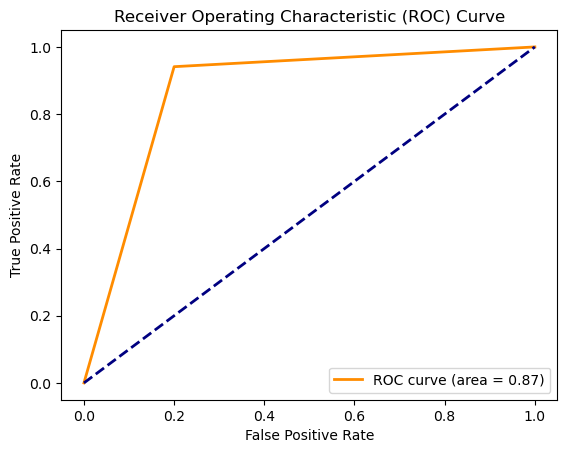

In [115]:
# plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Saving the model

In [116]:
import joblib
joblib.dump(loan_model,'loan_status.pki')

['loan_status.pki']

In [117]:
model = joblib.load('loan_status.pki')
prediction = model.predict(x_test)
prediction

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1])

In [118]:
a = np.array(y_test)
df_loan = pd.DataFrame()
df_loan['Predicted'] = prediction
df_loan['Original'] = a

In [119]:
df_loan

,Predicted,Original
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
239,1,1
240,0,0
241,1,1
242,0,0


# Acurracy is 86.88% using model extratrees classifier

# 